In [1]:
import pandas as pd
import numpy as np
# Load normalized dataset from Azure Machine Learning
data = pd.read_csv('./normalise/trainsupermarketsizefilled.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              4990 non-null   object 
 1   Supermarket_Identifier          4990 non-null   object 
 2   Product_Supermarket_Identifier  4990 non-null   object 
 3   Product_Weight                  4188 non-null   float64
 4   Product_Fat_Content             4990 non-null   object 
 5   Product_Shelf_Visibility        4990 non-null   float64
 6   Product_Type                    4990 non-null   object 
 7   Product_Price                   4990 non-null   float64
 8   Supermarket_Opening_Year        4990 non-null   int64  
 9   Supermarket _Size               4990 non-null   object 
 10  Supermarket_Location_Type       4990 non-null   object 
 11  Supermarket_Type                4990 non-null   object 
 12  Product_Supermarket_Sales       49

In [3]:
data

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.60,Low Fat,0.068535,Soft Drinks,357.54,2005,Small,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.60,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.60,Low Fat,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.60,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.60,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,NCZ54,CHUKWUDI045,NCZ54_CHUKWUDI045,14.65,Low Fat,0.083528,Household,406.14,2009,High,Cluster 2,Supermarket Type1,5685.93
4986,NCZ54,CHUKWUDI046,NCZ54_CHUKWUDI046,14.65,Low Fat,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00
4987,NCZ54,CHUKWUDI049,NCZ54_CHUKWUDI049,14.65,Low Fat,0.083489,Household,403.39,2006,Medium,Cluster 1,Supermarket Type1,17870.07
4988,NCZ54,CHUKWUDI019,NCZ54_CHUKWUDI019,NaN,Low Fat,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
# Display column headers
data.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [6]:
features = []
for i in data.columns:
    features.append(i)
    
print(features)

['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier', 'Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type', 'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type', 'Product_Supermarket_Sales']


In [7]:
predictors = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type', 'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type', 'Product_Supermarket_Sales']

In [8]:
X = data[predictors]
# Display the predictors
# X
# X.info()

In [9]:
# Identify categorical features
cat = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type']
Xcat = X[cat]
# Convert categorical features to numerical using LabelEncoder
Xcat = Xcat.apply(LabelEncoder().fit_transform)

In [10]:
# Identify numerical features
num = ['Product_Shelf_Visibility', 'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']
Xnum = X[num]
# Create new
Xtrain = pd.concat([Xcat,Xnum],axis=1)

In [11]:
Xtrain

,Product_Identifier,Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
0,0,0,0,14,2,2,0,0.068535,357.54,2005,709.08
1,0,1,0,14,0,2,1,0.040912,355.79,1994,6381.69
2,0,2,0,14,1,1,1,0.041178,350.79,2014,6381.69
3,0,3,0,14,1,2,2,0.041113,355.04,2016,2127.23
4,0,6,2,14,2,1,1,0.000000,354.79,2011,2481.77
...,...,...,...,...,...,...,...,...,...,...,...
4985,1450,7,0,9,0,1,1,0.083528,406.14,2009,5685.93
4986,1450,8,0,9,2,0,1,0.083359,404.89,2004,11778.00
4987,1450,9,0,9,1,0,1,0.083489,403.39,2006,17870.07
4988,1450,4,0,9,2,0,0,0.145952,402.39,1992,406.14


In [12]:
Xtrain.corr()['Product_Supermarket_Sales'].sort_values()

Product_Shelf_Visibility    -0.164943
Supermarket _Size           -0.150212
Product_Identifier          -0.016508
Product_Fat_Content          0.009485
Product_Type                 0.016474
Supermarket_Opening_Year     0.051297
Supermarket_Location_Type    0.060871
Supermarket_Identifier       0.268973
Product_Price                0.518285
Supermarket_Type             0.554920
Product_Supermarket_Sales    1.000000
Name: Product_Supermarket_Sales, dtype: float64

In [13]:
correlation = Xtrain.corr(method='pearson')
columns = correlation.nlargest(13, 'Product_Supermarket_Sales').index
print(columns)

Index(['Product_Supermarket_Sales', 'Supermarket_Type', 'Product_Price',
       'Supermarket_Identifier', 'Supermarket_Location_Type',
       'Supermarket_Opening_Year', 'Product_Type', 'Product_Fat_Content',
       'Product_Identifier', 'Supermarket _Size', 'Product_Shelf_Visibility'],
      dtype='object')


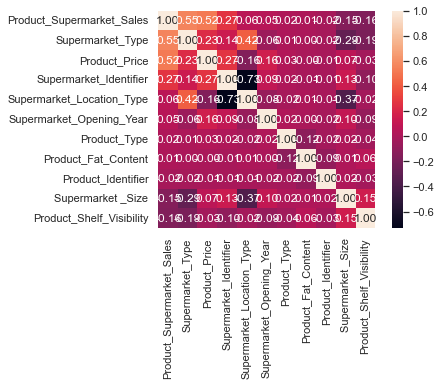

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_map = np.corrcoef(Xtrain[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

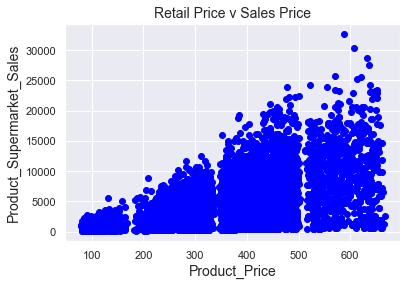

In [15]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Product_Price'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Retail Price v Sales Price', fontsize=14)
plt.xlabel('Product_Price', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()

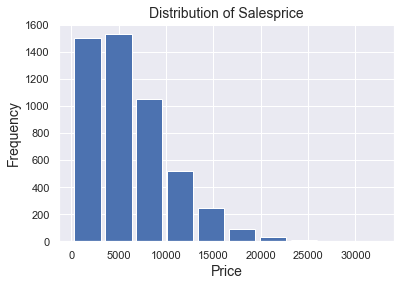

In [16]:
import matplotlib.pyplot as plt
# Plot a histogram of Product Price
plt.hist(data['Product_Supermarket_Sales'], rwidth=0.85)
plt.title('Distribution of Salesprice', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

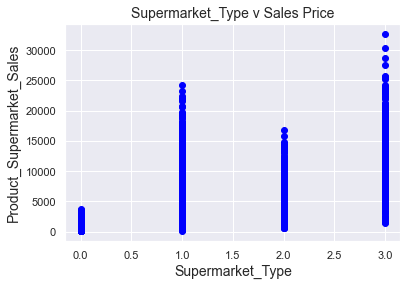

In [17]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Supermarket_Type'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Supermarket_Type v Sales Price', fontsize=14)
plt.xlabel('Supermarket_Type', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()
# Grocery stores have the lowest prices while Supermarket Type 3 has the highest prices

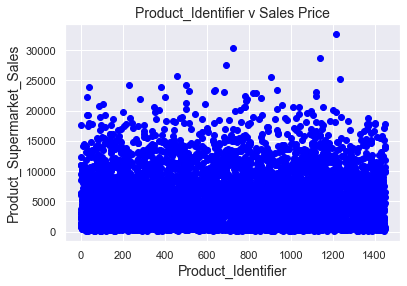

In [18]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Product_Identifier'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Product_Identifier v Sales Price', fontsize=14)
plt.xlabel('Product_Identifier', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()

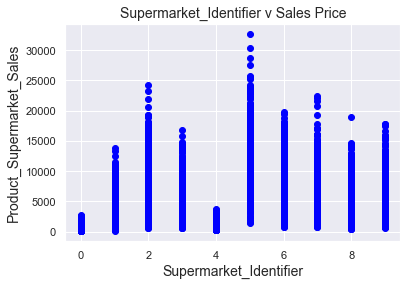

In [19]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Supermarket_Identifier'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Supermarket_Identifier v Sales Price', fontsize=14)
plt.xlabel('Supermarket_Identifier', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()

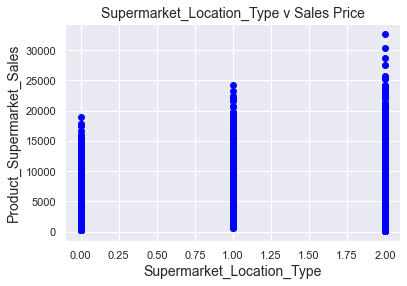

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Supermarket_Location_Type'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Supermarket_Location_Type v Sales Price', fontsize=14)
plt.xlabel('Supermarket_Location_Type', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()


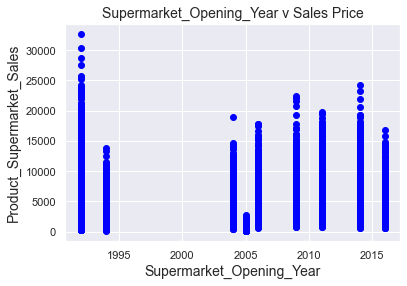

In [21]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Supermarket_Opening_Year'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Supermarket_Opening_Year v Sales Price', fontsize=14)
plt.xlabel('Supermarket_Opening_Year', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()

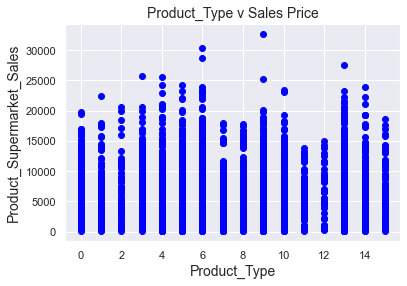

In [22]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Product_Type'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Product_Type v Sales Price', fontsize=14)
plt.xlabel('Product_Type', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()

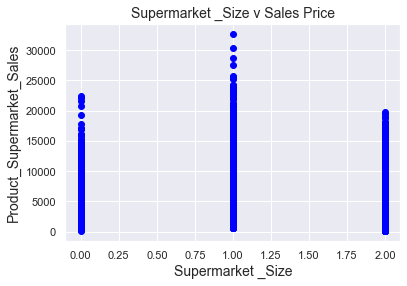

In [23]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain['Supermarket _Size'], Xtrain['Product_Supermarket_Sales'], color='blue')
plt.title('Supermarket _Size v Sales Price', fontsize=14)
plt.xlabel('Supermarket _Size', fontsize=14)
plt.ylabel('Product_Supermarket_Sales', fontsize=14)
plt.grid(True)
plt.show()

In [24]:
#Xtrain.Product_Supermarket_Sales = Xtrain.Product_Supermarket_Sales.astype(int)
#Xtrain['Product_Supermarket_Sales'] = np.sqrt(Xtrain['Product_Supermarket_Sales'])
#Xtrain

In [25]:
#Xtrain['Product_Supermarket_Sales'] = (Xtrain['Product_Supermarket_Sales'])

In [26]:
# Identnify varibale to be predicted
y = Xtrain['Product_Supermarket_Sales'].values
y

array([  709.08,  6381.69,  6381.69, ..., 17870.07,   406.14, 13808.69])

In [27]:
#Xtrain
Xtrain = Xtrain.drop('Product_Supermarket_Sales', axis = 1).values
Xtrain

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.85350390e-02, 3.57540000e+02, 2.00500000e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.09118240e-02, 3.55790000e+02, 1.99400000e+03],
       [0.00000000e+00, 2.00000000e+00, 0.00000000e+00, ...,
        4.11775050e-02, 3.50790000e+02, 2.01400000e+03],
       ...,
       [1.45000000e+03, 9.00000000e+00, 0.00000000e+00, ...,
        8.34889920e-02, 4.03390000e+02, 2.00600000e+03],
       [1.45000000e+03, 4.00000000e+00, 0.00000000e+00, ...,
        1.45951533e-01, 4.02390000e+02, 1.99200000e+03],
       [1.45000000e+03, 5.00000000e+00, 0.00000000e+00, ...,
        8.29557190e-02, 4.10140000e+02, 1.99200000e+03]])

In [28]:
#correlation = Xtrain.corr(method='pearson')
#columns = correlation.nlargest(10, 'Product_Supermarket_Sales').index
#print(columns)

#import matplotlib.pyplot as plt
#import seaborn as sns
#correlation_map = np.corrcoef(Xnew[columns].values.T)
#sns.set(font_scale=1.0)
#heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

#plt.show()

In [29]:
test = pd.read_csv('./normalise/testsupermarketsizefilled.csv')
# test

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              3532 non-null   object 
 1   Supermarket_Identifier          3532 non-null   object 
 2   Product_Supermarket_Identifier  3532 non-null   object 
 3   Product_Weight                  2871 non-null   float64
 4   Product_Fat_Content             3532 non-null   object 
 5   Product_Shelf_Visibility        3532 non-null   float64
 6   Product_Type                    3532 non-null   object 
 7   Product_Price                   3532 non-null   float64
 8   Supermarket_Opening_Year        3532 non-null   int64  
 9   Supermarket _Size               3532 non-null   object 
 10  Supermarket_Location_Type       3532 non-null   object 
 11  Supermarket_Type                3532 non-null   object 
dtypes: float64(3), int64(1), object(8)

In [31]:
test.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size',
       'Supermarket_Location_Type', 'Supermarket_Type'],
      dtype='object')

In [32]:
testpredictors = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type', 'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type']
X1 = test[testpredictors]
#X1.info()

In [33]:
# Convert categorical features to numerical features
testcat = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type']
Xtestcat = X1[testcat]
# Convert categorical features to numerical using LabelEncoder
Xtestcat = Xtestcat.apply(LabelEncoder().fit_transform)

# Identify numerical features
testnum = ['Product_Shelf_Visibility', 'Product_Price', 'Supermarket_Opening_Year']
Xtestnum = X1[testnum]
# Create new
Xtest = pd.concat([Xtestcat,Xtestnum],axis=1)


In [34]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
#scaler.fit(Xtestnew)
#Xtest = pd.DataFrame(scaler.transform(Xtestnew), index=Xtestnew.index, columns=Xtestnew.columns)
# data3
# data4 = pd.DataFrame(scaler.inverse_transform(data1), index=data1.index, columns=data1.columns)
# Xtest

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, y, test_size = 0.05, random_state=100)

scaler = MinMaxScaler().fit(X_train)
rescaled_Xtrain = scaler.transform(X_train)

model = GradientBoostingRegressor(max_depth=9, n_estimators = 1000, random_state=100, max_features='auto')
model.fit(rescaled_Xtrain, Y_train)
print(model.feature_importances_)
print(model.n_features_)

[0.0836545  0.01766369 0.01006249 0.03351986 0.01250053 0.00498551
 0.29853253 0.12136305 0.30493157 0.11278626]
10


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_test)
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (np.sqrt(mean_squared_error(Y_test, predictions)))

3423.7152844962075


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(Xtrain)
rescaled_Xtrain = scaler.transform(Xtrain)
model = GradientBoostingRegressor(max_depth=9, n_estimators = 1000, random_state=100)
model.fit(rescaled_Xtrain, y)

scaler = MinMaxScaler().fit(Xtrain)
rescaled_Xtest = scaler.transform(Xtrain)
predictions = model.predict(rescaled_Xtest)
print (np.sqrt(mean_squared_error(y, predictions)))

42.568376864626515


In [38]:
compare = pd.DataFrame({'Prediction': predictions, 'Actual Data' : y})
compare.head(10)

,Prediction,Actual Data
0,707.993070,709.08
1,6387.791329,6381.69
2,6378.021668,6381.69
3,2144.567392,2127.23
4,2478.806379,2481.77
5,9576.020531,9572.54
6,815.971351,818.93
7,11042.748402,11055.61
8,2883.998604,2866.27
9,8576.178210,8598.81


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(Xtrain)
rescaled_Xtrain = scaler.transform(Xtrain)
model = GradientBoostingRegressor(max_depth=8, n_estimators = 1000, random_state=100)
model.fit(rescaled_Xtrain, y)

scaler = MinMaxScaler().fit(Xtest)
rescaled_Xtest = scaler.transform(Xtest)
predictions = model.predict(rescaled_Xtest)

In [40]:
predic = predictions
predic

array([ 1063.89551573, 13588.78685558, 10090.73345796, ...,
       10040.5343769 ,  4230.20467723,  6913.59911769])

In [42]:
predic = pd.DataFrame(predictions)
predic
dataExport = pd.concat([Xtest,predic],axis=1)
dataExport.to_csv('./submissions/Submission43.csv', index=False)

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, y, test_size = 0.05, random_state=100)

scaler = MinMaxScaler().fit(X_train)
rescaled_Xtrain = scaler.transform(X_train)

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8), n_estimators = 1000, random_state=100)
model.fit(rescaled_Xtrain, Y_train)
print(model.feature_importances_)
#print(model.decision_path(rescaled_Xtrain))

[0.18653689 0.03271688 0.02212953 0.08772833 0.02605444 0.01251855
 0.07710685 0.19919103 0.32493219 0.03108531]


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_test)
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (np.sqrt(mean_squared_error(Y_test, predictions)))

3286.4093136327083


In [45]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, y, test_size = 0.05, random_state=100)

scaler = MinMaxScaler().fit(X_train)
rescaled_Xtrain = scaler.transform(X_train)

model = ExtraTreesRegressor(max_depth=7, n_estimators = 1000, random_state=100, n_jobs=-1, max_features='auto')
model.fit(rescaled_Xtrain, Y_train)
print(model.feature_importances_)
print(model.n_features_)
#print(model.decision_path(rescaled_Xtrain))

[0.00712985 0.04816871 0.00505091 0.00621858 0.01403664 0.01849489
 0.54080644 0.00669395 0.27930858 0.07409146]
10


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_test)
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (np.sqrt(mean_squared_error(Y_test, predictions)))

2844.8046561224764


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, y, test_size = 0.05, random_state=100)

scaler = MinMaxScaler().fit(X_train)
rescaled_Xtrain = scaler.transform(X_train)

model = RandomForestRegressor(max_depth=5, n_estimators = 1000, random_state=100, n_jobs=-1, max_features='auto')
model.fit(rescaled_Xtrain, Y_train)
print(model.feature_importances_)
print(model.n_features_)
#print(model.decision_path(rescaled_Xtrain))

[8.74286834e-03 1.82319717e-04 4.68079094e-04 2.59278686e-03
 2.04640581e-04 2.17929524e-04 5.13615330e-01 6.36863327e-03
 3.53498029e-01 1.14109384e-01]
10


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_test)
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (np.sqrt(mean_squared_error(Y_test, predictions)))

2865.2963597268003


In [49]:
compare = pd.DataFrame({'Prediction': predictions, 'Actual Data' : Y_test})
compare.head(10)

,Prediction,Actual Data
0,3881.721123,2563.33
1,3989.283100,5278.13
2,6834.452364,1253.37
3,6389.306927,6734.57
4,1132.599809,878.86
5,6176.047979,4574.05
6,3888.062167,4554.07
7,9644.195249,15491.50
8,4080.775076,3175.87
9,7677.463465,1810.98


In [50]:
actualytest = np.exp(Y_test)
predictedytest = np.exp(predictions)
compare_actual = pd.DataFrame({'Prediction': predictedytest, 'Actual Data' : actualytest})
compare_actual

C:\Users\Marvel\AppData\Local\Temp/ipykernel_20016/3468511850.py:1: RuntimeWarning: overflow encountered in exp
  actualytest = np.exp(Y_test)
C:\Users\Marvel\AppData\Local\Temp/ipykernel_20016/3468511850.py:2: RuntimeWarning: overflow encountered in exp
  predictedytest = np.exp(predictions)


,Prediction,Actual Data
0,inf,inf
1,inf,inf
2,inf,inf
3,inf,inf
4,inf,inf
...,...,...
245,inf,inf
246,inf,inf
247,inf,inf
248,inf,inf


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(Xtrain)
rescaled_Xtrain = scaler.transform(Xtrain)
model = RandomForestRegressor(n_estimators = 1000, max_depth=9, random_state=100, n_jobs=-1)
model.fit(rescaled_Xtrain, y)

predictions = model.predict(rescaled_Xtrain)
print (np.sqrt(mean_squared_error(y, predictions)))


2474.9171910659766


In [52]:
compare = pd.DataFrame({'Prediction': predictions, 'Actual Data' : y})
compare.head(10)

,Prediction,Actual Data
0,696.165938,709.08
1,5682.886388,6381.69
2,5219.020166,6381.69
3,3948.286570,2127.23
4,5506.776761,2481.77
5,5902.314406,9572.54
6,966.062463,818.93
7,6935.608392,11055.61
8,6103.293119,2866.27
9,6773.078563,8598.81


In [53]:
actualy = np.square(y)
predictedy = np.square(predictions)
compare_actual = pd.DataFrame({'Prediction': predictedy, 'Actual Data' : actualy})
compare_actual

,Prediction,Actual Data
0,4.846470e+05,5.027944e+05
1,3.229520e+07,4.072597e+07
2,2.723817e+07,4.072597e+07
3,1.558897e+07,4.525107e+06
4,3.032459e+07,6.159182e+06
...,...,...
4985,6.805609e+07,3.232980e+07
4986,9.528384e+07,1.387213e+08
4987,1.567140e+08,3.193394e+08
4988,7.757992e+05,1.649497e+05


In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

scaler = MinMaxScaler().fit(Xtrain)
rescaled_Xtrain = scaler.transform(Xtrain)
model = AdaBoostRegressor(RandomForestRegressor(max_depth=5), n_estimators = 2000, random_state=100)
model.fit(rescaled_Xtrain, y)

scaler = MinMaxScaler().fit(Xtest)
rescaled_Xtest = scaler.transform(Xtest)
predictions = model.predict(rescaled_Xtest)


In [55]:
predic = predictions
predic

array([2853.52835996, 7739.68125096, 7857.14893986, ..., 9678.00812647,
       3169.09413415, 8202.0283788 ])

In [56]:
predic = pd.DataFrame(predictions)
predic
dataExport = pd.concat([Xtest,predic],axis=1)
dataExport.to_csv('./submissions/ubmission40.csv', index=False)

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(Xtrain)
rescaled_Xtrain = scaler.transform(Xtrain)
model = ExtraTreesRegressor(n_estimators = 1000, max_depth=10, random_state=100, n_jobs=-1)
model.fit(rescaled_Xtrain, y)

scaler = MinMaxScaler().fit(Xtest)
rescaled_Xtest = scaler.transform(Xtest)
predictions = model.predict(rescaled_Xtest)

In [58]:
predic = predictions
predic

array([1369.39323478, 8325.32896136, 7424.91376098, ..., 8981.21113082,
       1117.7375275 , 6319.78024841])

In [60]:
predic = pd.DataFrame(predictions)
predic
dataExport = pd.concat([Xtest,predic],axis=1)
dataExport.to_csv('./submissions/Submission36.csv', index=False)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(Xtrain)
rescaled_Xtrain = scaler.transform(Xtrain)
model = RandomForestRegressor(n_estimators = 1000, max_depth=9, random_state=100, n_jobs=-1, warm_start=True)
model.fit(rescaled_Xtrain, y)

scaler = MinMaxScaler().fit(Xtest)
rescaled_Xtest = scaler.transform(Xtest)
predictions = model.predict(rescaled_Xtest)

In [62]:
predic = predictions
predic

array([1031.10263458, 8381.95214366, 7888.58259267, ..., 9536.59961084,
       2211.89862327, 7778.75704283])

In [64]:
predic = pd.DataFrame(predictions)
predic
dataExport = pd.concat([Xtest,predic],axis=1)
dataExport.to_csv('./submissions/Submission39.csv', index=False)

In [ ]:
actualy = predictions
#actualy
predic = pd.DataFrame(actualy)
predic
dataExport = pd.concat([Xtestnew,predic],axis=1)
dataExport.to_csv('C:\\Users\\USER\\Documents\\INTER CAMPUS MACHINE LEARNING 2018\\NORMALISED\\Submission19.csv', index=False)